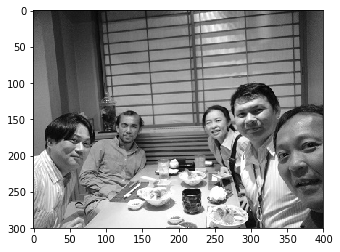

In [12]:
import random
import math
import copy
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from skimage import color

S = [] # to keep singular value of each windows

a = 40 # left end of embedding information
b = 60 # right end of embedding information

image = img.imread('ImgSource/test1.jpg')
gray_image = color.rgb2gray(image)
implot = plt.imshow(gray_image, cmap='gray')
M,N,_ = image.shape
window_size = math.gcd(M,N)

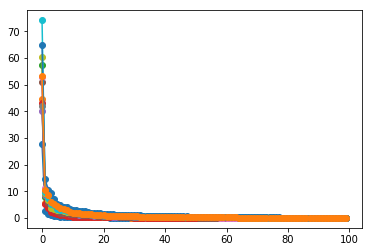

In [13]:
for y in range(0,M,window_size):
    for x in range(0,N,window_size):
        u,s,vh = np.linalg.svd(gray_image[y:y+window_size,x:x+window_size],full_matrices=True)
        plt.plot(s,'o-')
        S.append(s)

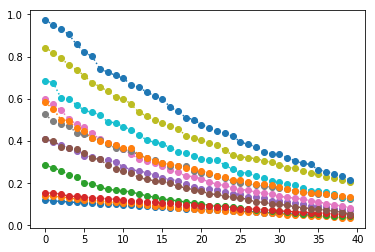

In [14]:
for i,s in enumerate(S):
    plt.plot(s[a-10:b+10],'o:') # S before embedded informations

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


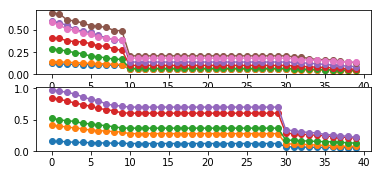

In [15]:
embedded_bits = [ random.randint(0,1) for bit in range(len(S))] # random hidden bits 0 or 1
for i,s in enumerate(S):
    if embedded_bits[i] == 0:
        s[a:b]=s[b]
        plt.subplot(312)
        plt.plot(s[a-10:b+10],'o-') # Embedding 0
    else:
        s[a:b]=s[a]
        plt.subplot(313)
        plt.plot(s[a-10:b+10],'o-') # Embedding 1
    S[i] = s
        


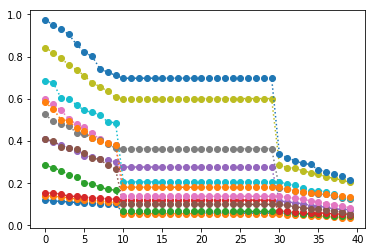

In [16]:
for i,s in enumerate(S):
    plt.plot(s[a-10:b+10],'o:') # S after embedded informations

In [17]:
window_num = 0
modified_image = copy.deepcopy(gray_image)
for y in range(0,M,window_size):
    for x in range(0,N,window_size):
        u,_,vh = np.linalg.svd(gray_image[y:y+window_size,x:x+window_size],full_matrices=True)
        diag_s = np.diag(S[window_num])
        modified_image[y:y+window_size,x:x+window_size] = np.dot(u,np.dot(diag_s,vh))
        window_num = window_num+1

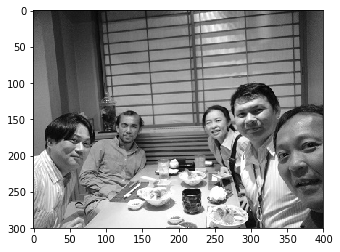

In [18]:
plt.imshow(gray_image, cmap='gray')

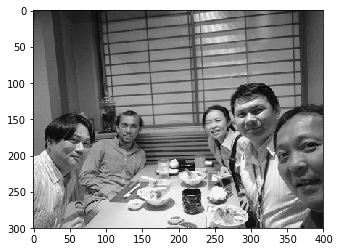

In [19]:
plt.imshow(modified_image, cmap='gray')

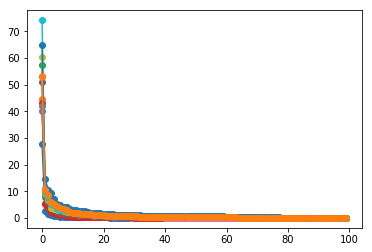

In [20]:
# Extraction Process
S = []
for y in range(0,M,window_size):
    for x in range(0,N,window_size):
        u,s,vh = np.linalg.svd(modified_image[y:y+window_size,x:x+window_size],full_matrices=True)
        plt.plot(s,'o-')
        S.append(s)

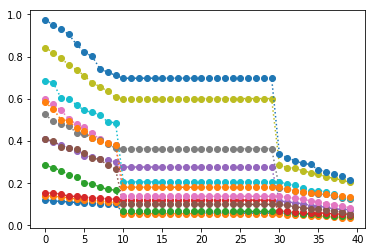

In [21]:
for i,s in enumerate(S):
    plt.plot(s[a-10:b+10],'o:') # extracted S after embedded informations